In [114]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv"
df = pd.read_csv(url)
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [115]:
df.shape

(5000, 15)

In [116]:
numerical_cols = ['Transaction_Amount', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend','Credit_Limit','Cardholder_Age']

print("Descriptive Statistics:")
print(df[numerical_cols].describe())

Descriptive Statistics:
       Transaction_Amount  Cardholder_Monthly_Income  \
count         4994.000000                4686.000000   
mean         74667.995995              137353.817542   
std          43089.045623               69471.623020   
min          25008.000000               35005.000000   
25%          39742.500000               73485.000000   
50%          60922.000000              131833.000000   
75%          98373.500000              189054.250000   
max         199923.000000              299907.000000   

       Cardholder_Average_Spend   Credit_Limit  Cardholder_Age  
count               4792.000000    4991.000000     4865.000000  
mean               63058.343566  124654.377880       49.106680  
std                40056.989704   55668.246494       18.398524  
min                10282.410000   50000.000000       18.000000  
25%                33336.742500  100000.000000       33.000000  
50%                49547.945000  100000.000000       49.000000  
75%             

In [117]:
categorical_cols = ['Card_Type', 'Merchant_Category', 'Location','Region','Cardholder_Gender']

for col in categorical_cols:
    if col in df.columns:
        print(f"\nValue counts for {col}:\n{df[col].value_counts()}")



Value counts for Card_Type:
Card_Type
Visa                1979
Mastercard          1540
RuPay                947
American Express     517
Name: count, dtype: int64

Value counts for Merchant_Category:
Merchant_Category
Online Shopping    1019
Retail              959
Utility bill        521
Education           519
Entertainment       517
Healthcare          496
Dining              481
Transportation      466
Name: count, dtype: int64

Value counts for Location:
Location
Surat        431
Kochi        415
Bengaluru    410
Hyderabad    395
Mumbai       387
Chennai      387
Lucknow      379
Pune         376
Kolkata      373
Jaipur       373
Patna        371
Delhi        357
Ahmedabad    346
Name: count, dtype: int64

Value counts for Region:
Region
South    1607
West     1540
North    1109
East      744
Name: count, dtype: int64

Value counts for Cardholder_Gender:
Cardholder_Gender
Female    2489
Male      2422
Name: count, dtype: int64


<ipython-input-118-2925372702>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, palette="Set3")


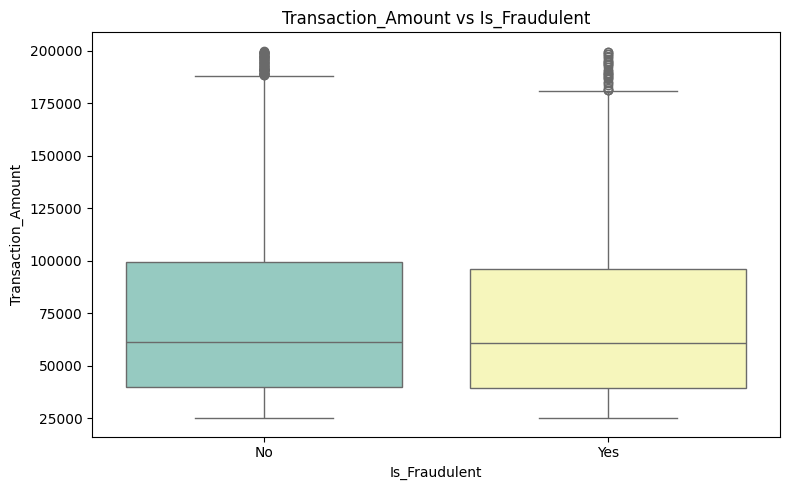

<ipython-input-118-2925372702>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, palette="Set3")


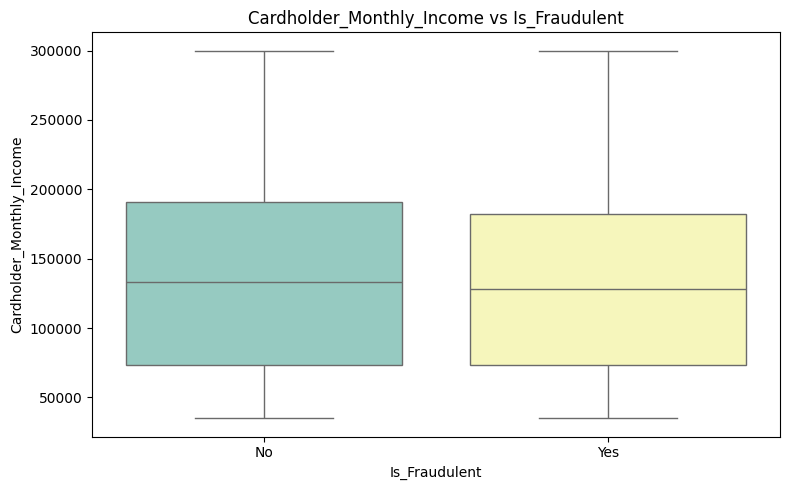

<ipython-input-118-2925372702>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, palette="Set3")


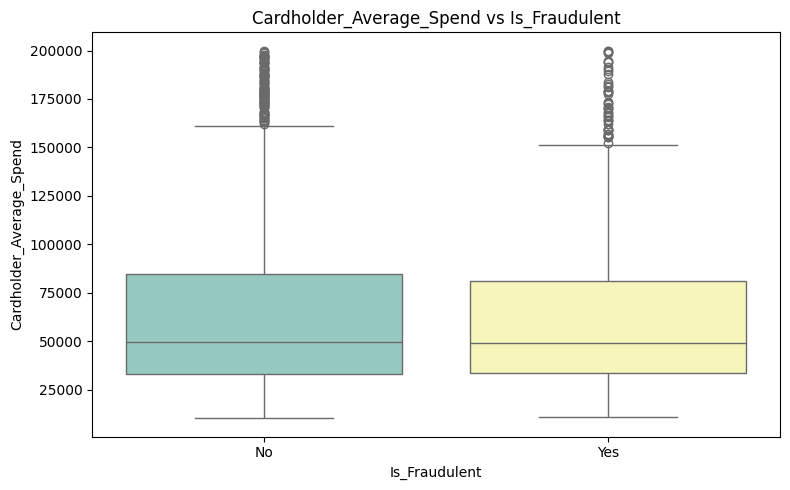

<ipython-input-118-2925372702>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, palette="Set3")


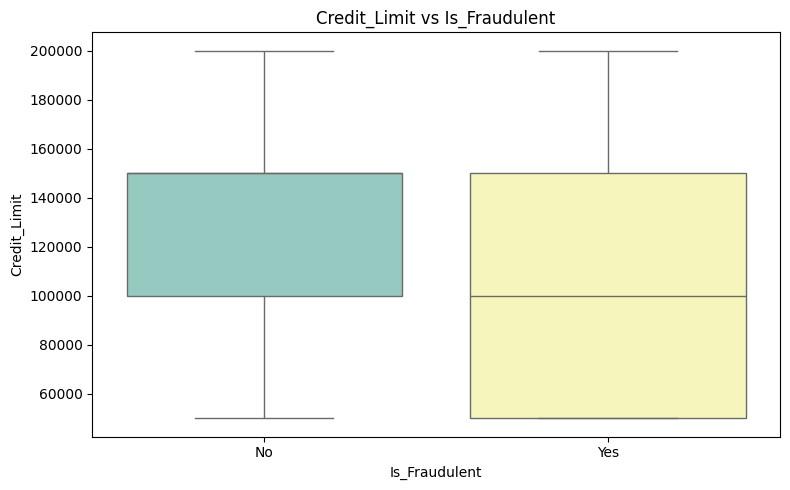

<ipython-input-118-2925372702>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, palette="Set3")


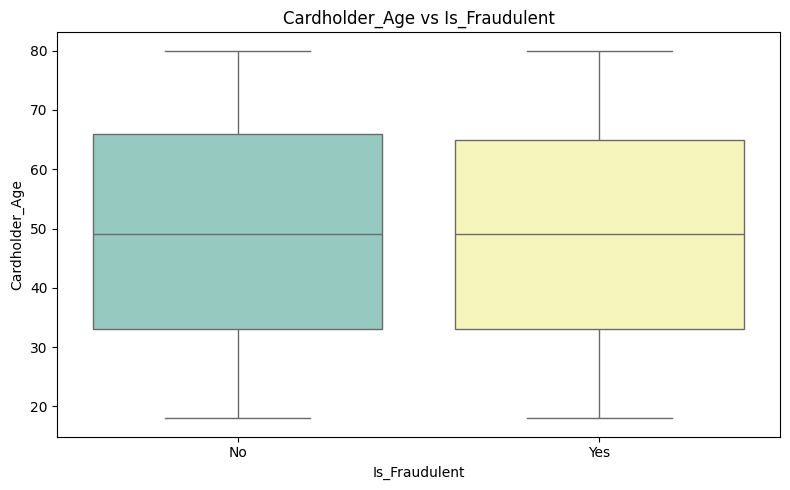

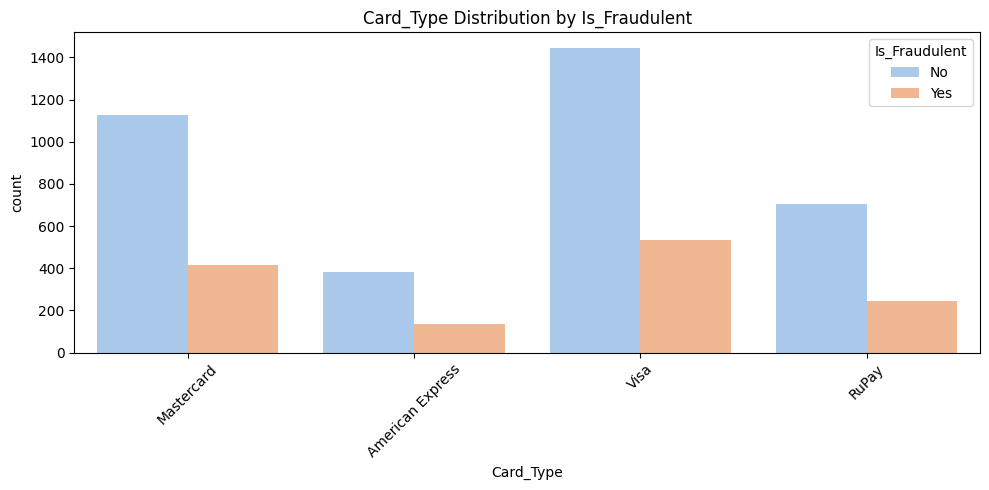

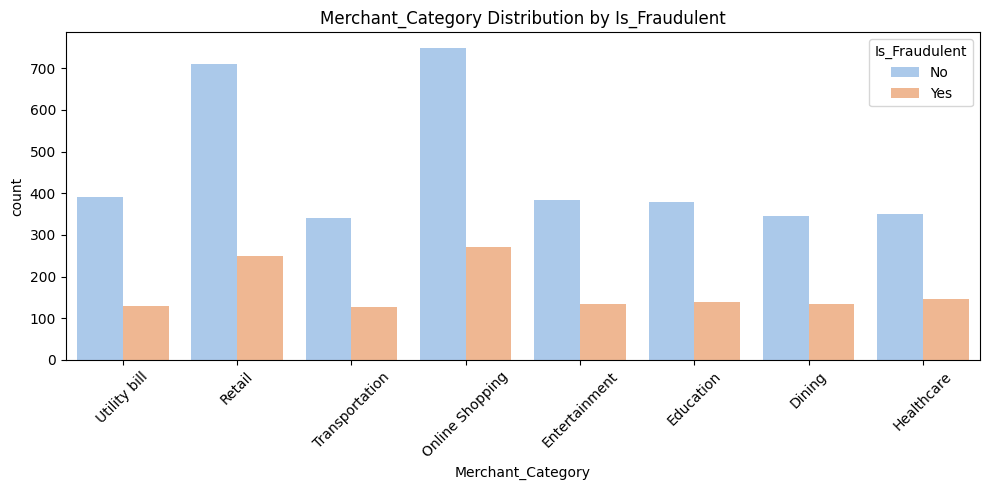

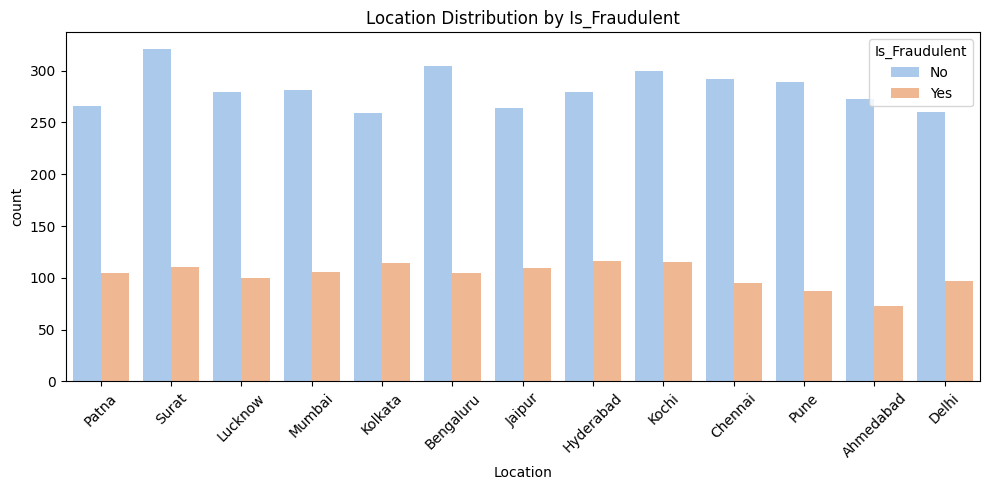

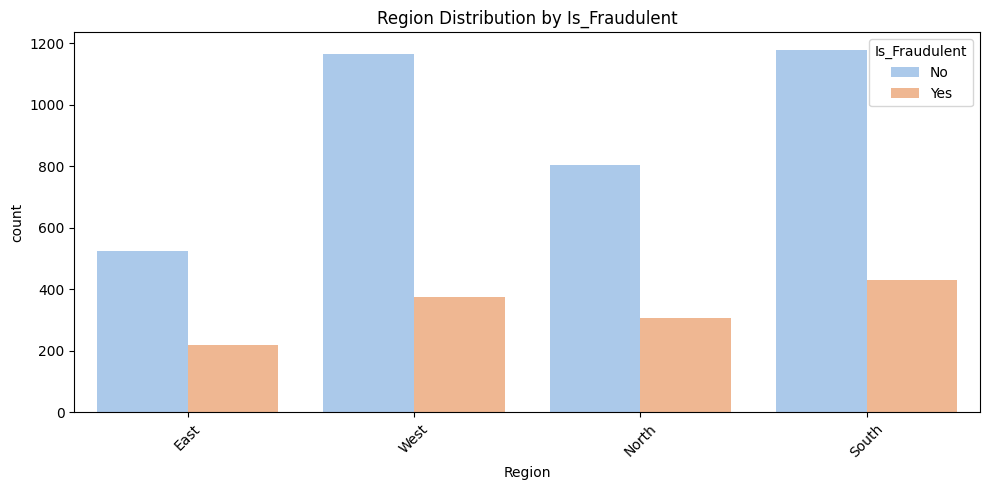

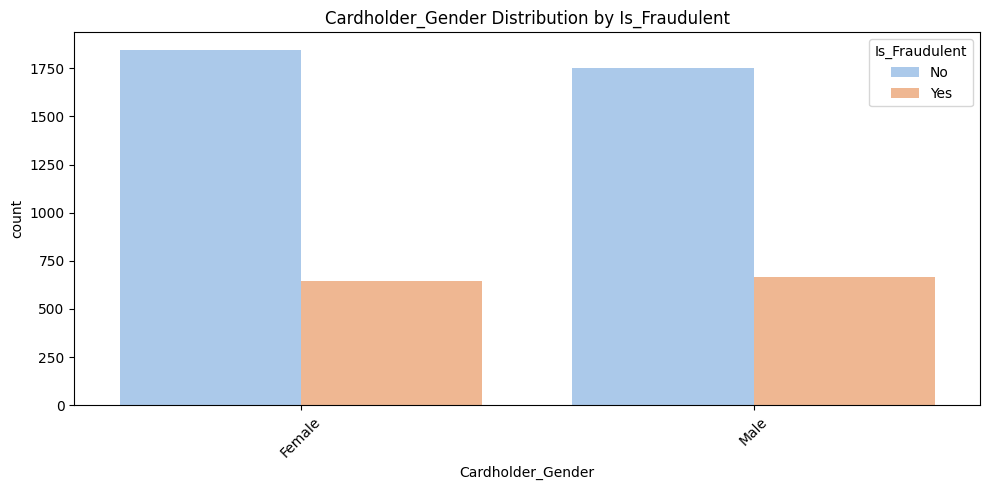

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

target = 'Is_Fraudulent'
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=target, y=col, palette="Set3")
    plt.title(f'{col} vs {target}')
    plt.tight_layout()
    plt.show()

for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=col, hue=target, palette='pastel')
        plt.title(f'{col} Distribution by {target}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


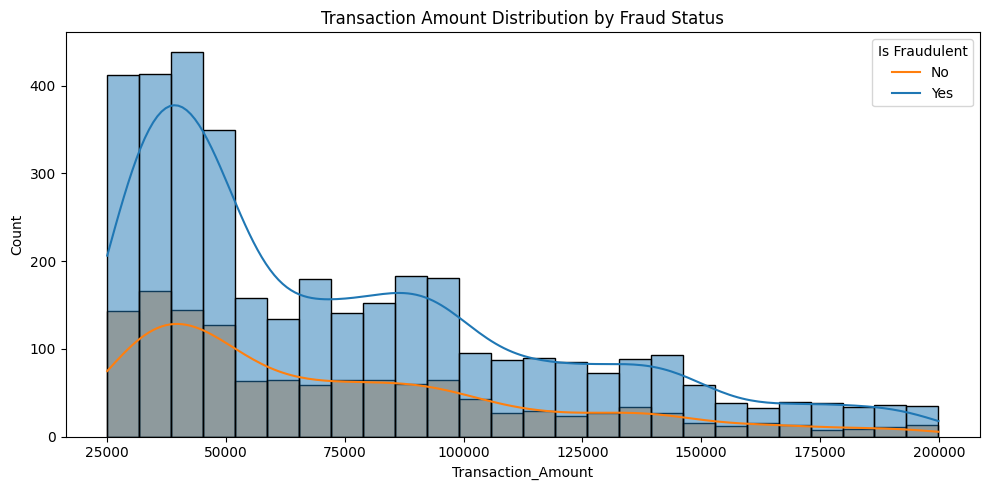

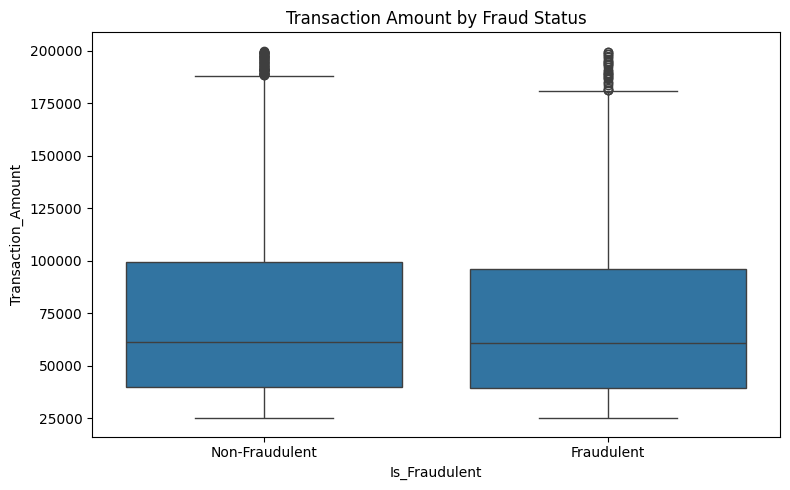

In [119]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Transaction_Amount', hue='Is_Fraudulent',kde=True)
plt.title("Transaction Amount Distribution by Fraud Status")
plt.legend(title="Is Fraudulent", labels=["No", "Yes"])
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Is_Fraudulent', y='Transaction_Amount')
plt.title("Transaction Amount by Fraud Status")
plt.xticks([0, 1], ["Non-Fraudulent", "Fraudulent"])
plt.tight_layout()
plt.show()

In [120]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


In [121]:
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

<ipython-input-121-2413223783>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)
<ipython-input-121-2413223783>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

In [122]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,0
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,0
Cardholder_Gender,0
Cardholder_Monthly_Income,0


In [123]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

def remove_outliers_iqr(data, columns):
    cleaned_data = data.copy()
    for col in columns:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        initial_shape = cleaned_data.shape[0]
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
        print(f"Removed {initial_shape - cleaned_data.shape[0]} outliers from '{col}'")
    return cleaned_data

df_cleaned = remove_outliers_iqr(df, numerical_cols)

Removed 97 outliers from 'Transaction_Amount'
Removed 0 outliers from 'Cardholder_Age'
Removed 0 outliers from 'Cardholder_Monthly_Income'
Removed 157 outliers from 'Cardholder_Average_Spend'
Removed 0 outliers from 'Credit_Limit'


In [124]:
df_cleaned.shape

(4746, 15)

<ipython-input-125-3965426951>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=target, y=col, palette="Set3")


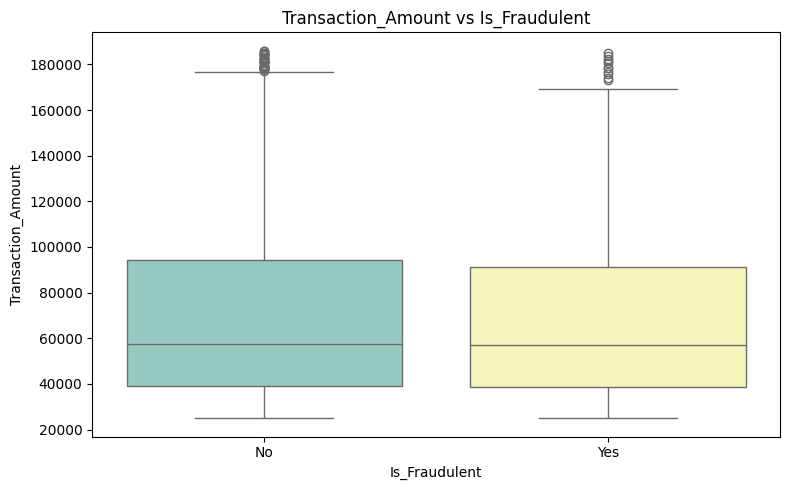

<ipython-input-125-3965426951>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=target, y=col, palette="Set3")


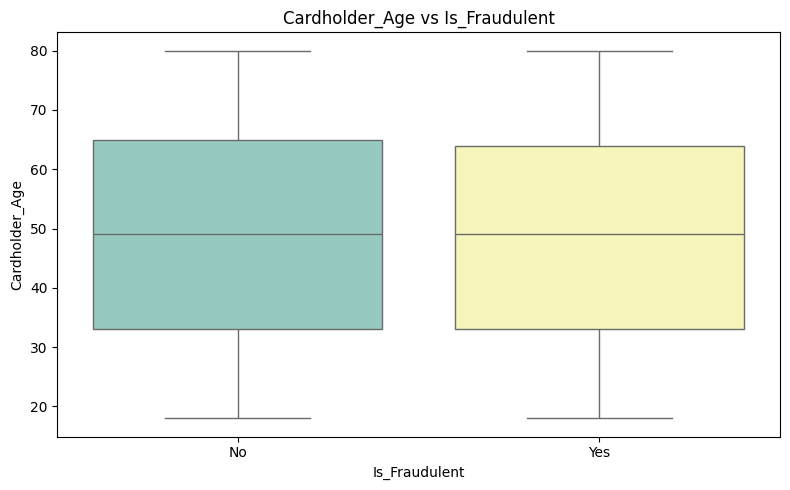

<ipython-input-125-3965426951>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=target, y=col, palette="Set3")


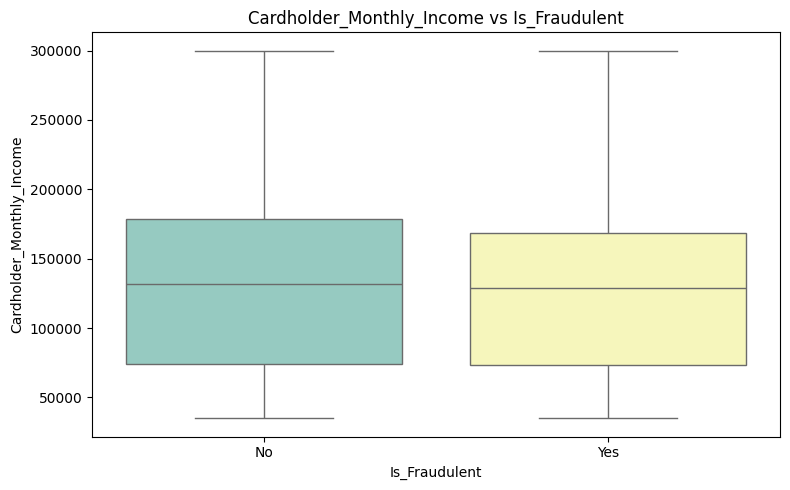

<ipython-input-125-3965426951>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=target, y=col, palette="Set3")


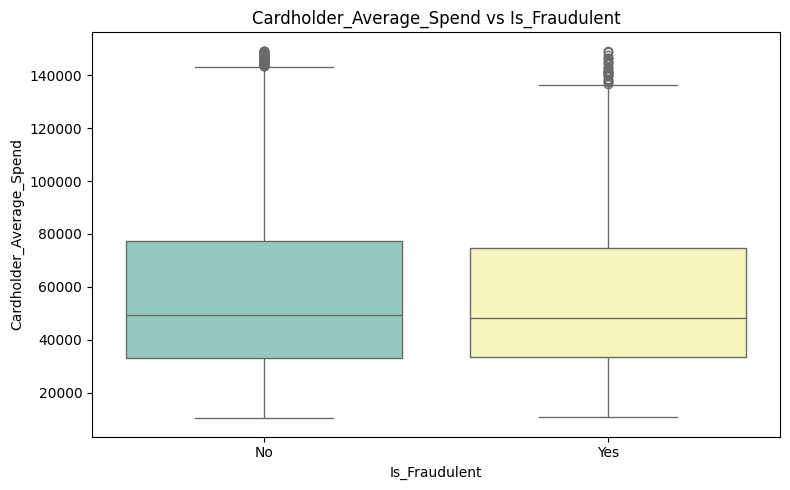

<ipython-input-125-3965426951>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=target, y=col, palette="Set3")


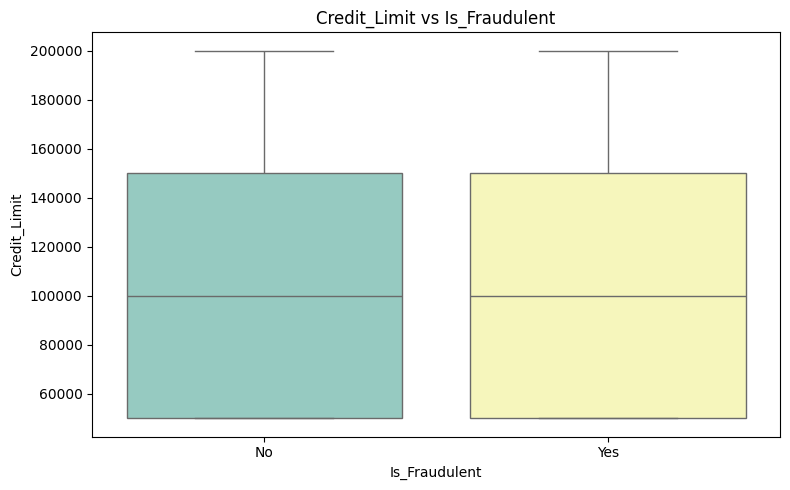

In [125]:
target = 'Is_Fraudulent'
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_cleaned, x=target, y=col, palette="Set3")
    plt.title(f'{col} vs {target}')
    plt.tight_layout()
    plt.show()

In [126]:
print("Skewness Scores:")
skew_scores = df_cleaned[numerical_cols].skew().sort_values(ascending=False)
print(skew_scores)

highly_skewed = skew_scores[abs(skew_scores) > 1].index.tolist()

Skewness Scores:
Cardholder_Average_Spend     0.950315
Transaction_Amount           0.935180
Cardholder_Monthly_Income    0.511040
Credit_Limit                 0.093652
Cardholder_Age              -0.010210
dtype: float64


In [127]:
import numpy as np

df_cleaned['Transaction_Amount'] = np.log1p(df_cleaned['Transaction_Amount'])

print("Skewness after log1p transformation:")
print(df_cleaned[['Transaction_Amount']].skew())


Skewness after log1p transformation:
Transaction_Amount    0.20328
dtype: float64


In [128]:
df_cleaned['Cardholder_Average_Spend'] = np.log1p(df_cleaned['Cardholder_Average_Spend'])

print("Skewness after log1p transformation:")
print(df_cleaned[['Cardholder_Average_Spend']].skew())

Skewness after log1p transformation:
Cardholder_Average_Spend   -0.088312
dtype: float64


In [129]:
print("Skewness Scores:")
skew_scores = df_cleaned[numerical_cols].skew().sort_values(ascending=False)
print(skew_scores)

highly_skewed = skew_scores[abs(skew_scores) > 1].index.tolist()

Skewness Scores:
Cardholder_Monthly_Income    0.511040
Transaction_Amount           0.203280
Credit_Limit                 0.093652
Cardholder_Age              -0.010210
Cardholder_Average_Spend    -0.088312
dtype: float64


In [130]:
df_cleaned['Cardholder_Average_Spend'] = np.sqrt(df_cleaned['Cardholder_Average_Spend'])

print("Skewness after log1p transformation:")
print(df_cleaned[['Cardholder_Average_Spend']].skew())

Skewness after log1p transformation:
Cardholder_Average_Spend   -0.14407
dtype: float64


In [131]:
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

print(categorical_cols)

['Transaction_ID', 'Card_Type', 'Merchant_Category', 'Transaction_DateTime', 'Location', 'Region', 'Cardholder_Gender', 'Device_Type', 'Day_of_Week', 'Is_Fraudulent']


In [132]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

df_cleaned.head()


,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,4191,1,7,10.211524,0,10,0,23.0,0,94632.0,3.240604,100000.0,4,6,0
1,3930,0,5,11.338060,1,12,3,49.0,1,148118.0,3.376154,150000.0,1,0,0
4,1835,2,5,11.304313,2,8,1,37.0,0,174470.0,3.297368,200000.0,2,2,0
5,1592,2,2,11.789943,3,9,3,80.0,1,166671.0,3.360759,150000.0,3,2,0
6,4410,3,5,11.842495,4,12,3,33.0,1,171991.0,3.367662,150000.0,1,3,1


In [133]:
Scaler = StandardScaler()
standardized_data= Scaler.fit_transform(df_cleaned)
standardized_data

array([[ 1.32732173, -0.84094761,  1.58321355, ...,  1.36073599,
         1.50834072, -0.60217807],
       [ 1.13681803, -1.79167112,  0.62730343, ..., -0.722059  ,
        -1.52560081, -0.60217807],
       [-0.39232083,  0.10977591,  0.62730343, ..., -0.02779401,
        -0.51428697, -0.60217807],
       ...,
       [ 0.68720011,  1.06049943, -0.32860669, ..., -0.722059  ,
        -0.51428697, -0.60217807],
       [-1.08645499,  0.10977591, -0.80656175, ..., -0.722059  ,
        -0.51428697, -0.60217807],
       [-1.27695868,  1.06049943, -0.32860669, ..., -0.02779401,
        -0.51428697, -0.60217807]])

In [134]:
cols=df_cleaned.columns

In [135]:
standardized_data=pd.DataFrame(standardized_data, columns=cols,)
standardized_data

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,1.327322,-0.840948,1.583214,-1.522187,-1.731686,1.045152,-1.712473,-1.439528,-0.968061,-0.583264,-0.511678,-0.379892,1.360736,1.508341,-0.602178
1,1.136818,-1.791671,0.627303,0.619456,-1.730956,1.578344,1.165161,-0.008443,1.032992,0.234015,1.046632,0.541870,-0.722059,-1.525601,-0.602178
2,-0.392321,0.109776,0.627303,0.555301,-1.730226,0.511959,-0.753262,-0.668944,-0.968061,0.636680,0.140895,1.463632,-0.027794,-0.514287,-0.602178
3,-0.569686,0.109776,-0.806562,1.478525,-1.729496,0.778555,1.165161,1.697850,1.032992,0.517509,0.869649,0.541870,0.666471,-0.514287,-0.602178
4,1.487170,1.060499,0.627303,1.578431,-1.728766,1.578344,1.165161,-0.889110,1.032992,0.598800,0.949012,0.541870,-0.722059,-0.008630,1.660638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,0.013503,0.109776,-1.284517,-0.963666,1.728766,-0.821022,-0.753262,-0.889110,-0.968061,-1.066379,-0.621326,-1.301654,-1.416324,-1.525601,1.660638
4742,-0.439764,-1.791671,0.149348,-0.656065,1.729496,-1.087618,0.205949,-0.008443,-0.968061,-0.014824,-1.617346,-0.379892,-1.416324,-1.525601,-0.602178
4743,0.687200,1.060499,-0.328607,-1.110854,1.730226,1.311748,1.165161,0.376849,1.032992,-1.099186,-0.637825,-1.301654,-0.722059,-0.514287,-0.602178
4744,-1.086455,0.109776,-0.806562,-0.853852,1.730956,-1.087618,0.205949,0.597016,1.032992,-1.006282,-0.685170,-1.301654,-0.722059,-0.514287,-0.602178


In [136]:
df_cleaned['Is_Fraudulent'].value_counts()

,count
Is_Fraudulent,
0,3483
1,1263


In [137]:
x= standardized_data.drop(columns=['Transaction_ID','Is_Fraudulent'])
y= df_cleaned['Is_Fraudulent']

In [138]:
x.shape

(4746, 13)

In [139]:
y.shape

(4746,)

In [200]:
from sklearn.feature_selection import SelectKBest, f_classif
selector= SelectKBest(score_func=f_classif,k=6)
x_new= selector.fit_transform(x,y)
selected_features= x.columns[selector.get_support()]
selected_features

Index(['Transaction_Amount', 'Location', 'Region', 'Cardholder_Gender',
       'Cardholder_Monthly_Income', 'Credit_Limit'],
      dtype='object')

In [201]:
x_new.shape

(4746, 6)

In [202]:
y.shape

(4746,)

In [203]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x_new, y, test_size=0.2, random_state=42)

In [204]:
x_train.shape

(3796, 6)

In [205]:
x_test.shape

(950, 6)

In [206]:
y_train.shape

(3796,)

In [207]:
y_test.shape

(950,)

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42)
}

results = {}

for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': acc, 'F1-Score': f1}

results_df = pd.DataFrame(results).T.sort_values(by='F1-Score', ascending=False)
print(results_df)



                        Accuracy  F1-Score
Decision Tree           0.588421  0.258065
K-Nearest Neighbors     0.688421  0.191257
Random Forest           0.693684  0.175637
Logistic Regression     0.741053  0.000000
Naive Bayes             0.741053  0.000000
Support Vector Machine  0.741053  0.000000


In [209]:
results_df = pd.DataFrame(results).T

best_model_f1 = results_df.sort_values(by='F1-Score', ascending=False).iloc[0]
print(best_model_f1)

best_model_acc = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]
print(best_model_acc)


Accuracy    0.588421
F1-Score    0.258065
Name: Decision Tree, dtype: float64
Accuracy    0.741053
F1-Score    0.000000
Name: Logistic Regression, dtype: float64


Accuracy: 0.6937
Precision: 0.2897
Recall: 0.1260
F1-Score: 0.1756


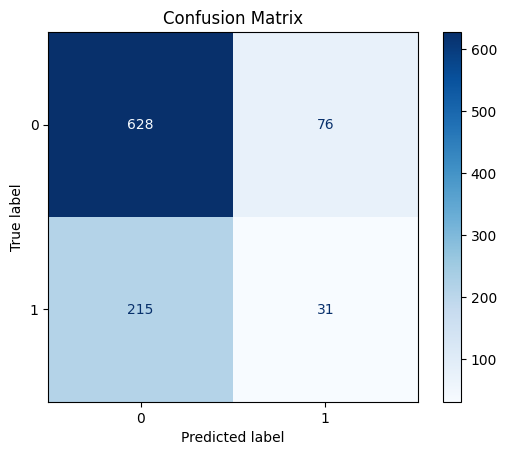

In [211]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

best_clf = RandomForestClassifier(random_state=42)

best_clf.fit(x_train, y_train)

y_pred = best_clf.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
